In [34]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the Dataset

In [35]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df['type'].value_counts()

type
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

#### Preprocessing the Dataset

#check for null values
df.isnull().sum()

#### Exploratory Data Analysis

<Axes: >

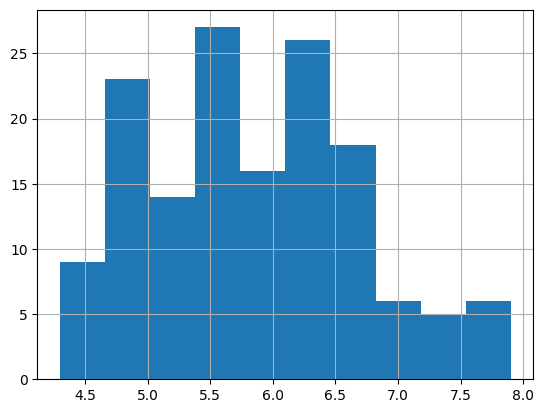

In [40]:
#histograms
df['sepal.length'].hist()

<Axes: >

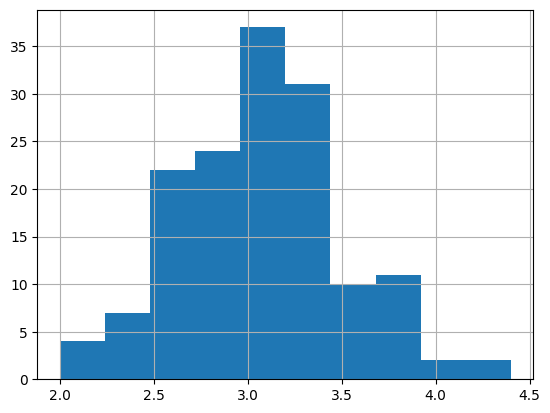

In [41]:
df['sepal.width'].hist()

<Axes: >

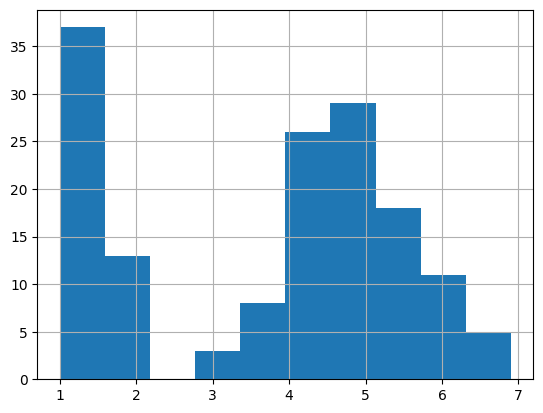

In [42]:
df['petal.length'].hist()

<Axes: >

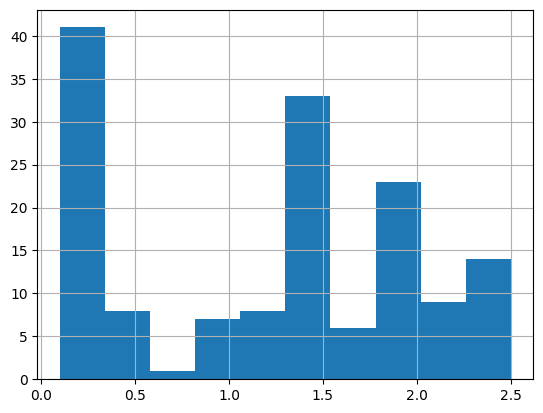

In [43]:
df['petal.width'].hist()

In [44]:
#scatter plot
colors=['red','orange','blue']
species=['Setosa','Virginica','Versicolor']
	

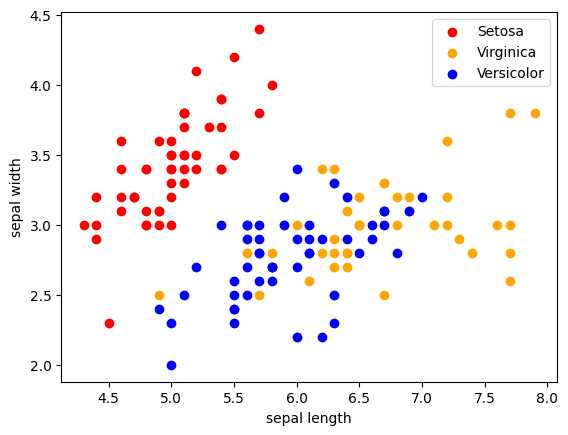

In [45]:
for i in range(3):
    x=df[df['type']==species[i]]
    plt.scatter(x['sepal.length'],x['sepal.width'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()


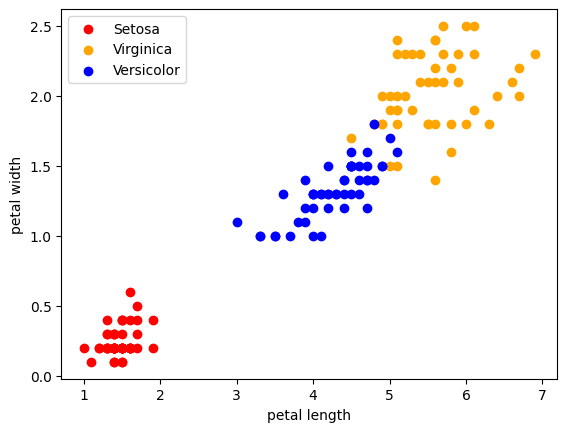

In [46]:
for i in range(3):
    x=df[df['type']==species[i]]
    plt.scatter(x['petal.length'],x['petal.width'],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()


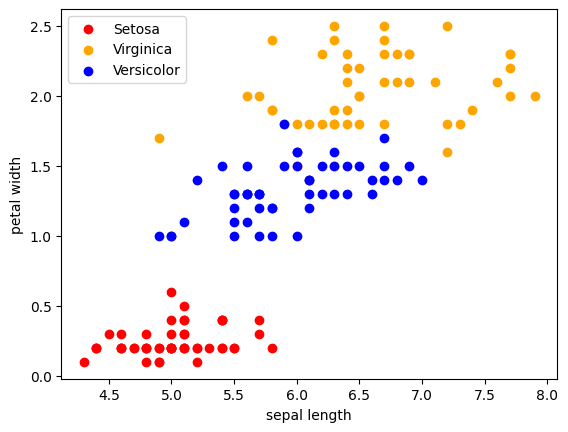

In [47]:
for i in range(3):
    x=df[df['type']==species[i]]
    plt.scatter(x['sepal.length'],x['petal.width'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal width")
plt.legend()


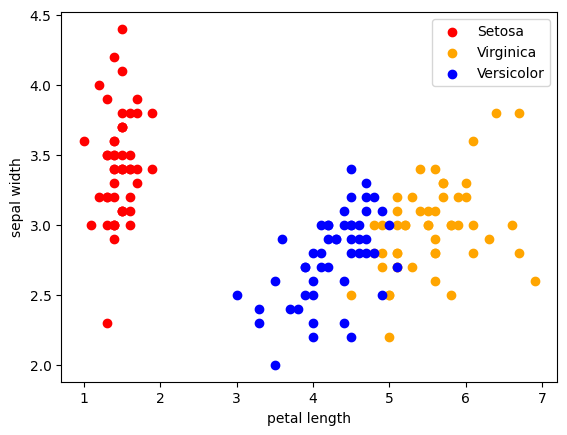

In [48]:
for i in range(3):
    x=df[df['type']==species[i]]
    plt.scatter(x['petal.length'],x['sepal.width'],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("sepal width")
plt.legend()


#### Correlation Matrix

In [49]:
num=df.select_dtypes(include=['float64','int64'])
num.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


corr = num.corr()
fig, ax = plt.subplots(figsize=(3,4))
sns.heatmap(corr, annot=True, ax=ax,cmap='coolwarm')

#### Label encoder

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
df['type'] = le.fit_transform(df['type'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Model Training

In [53]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['type'])
Y = df['type']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [55]:
# model training
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [71]:
# print metric to get performance
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [72]:
# knn - k-nearest neighbours
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [60]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [61]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
